# 数据

In [1]:
# 导入 TensorFlow
import tensorflow as tf
# 即显模式
tf.enable_eager_execution()

# 生成数据
n_example = 100
X = tf.random_normal([n_example])
# 称重误差
noise = tf.random_uniform([n_example], -0.5, 0.5)
Y = X * 2 + noise

# 训练集
train_x = X[:80]
train_y = Y[:80]

# 测试集
test_x = X[80:]
test_y = Y[80:]

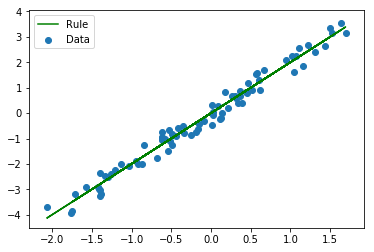

In [3]:
# 显示训练集
import matplotlib.pyplot as plt
plt.plot(train_x, train_y - noise[:80], color='green')
plt.scatter(train_x, train_y)
plt.legend(['Rule','Data'])

# 模型

In [4]:
import tensorflow.contrib.eager as tfe
# 定义模型
class Model(object):
    def __init__(self):
        # 参数
        # 初始化：随便给 参数 W 和 b 两个值
        self.W = tfe.Variable(1.)
        self.b = tfe.Variable(1.)
    
    def __call__(self, x):
        # 正向传递
        # 如何利用 参数 W 和 b 运算
        y = self.W * x + self.b
        return y
# 实例模型
model = Model()

# 训练

Epoch: 000 | Loss: 0.461 | W: 1.563 | b: 0.391
Epoch: 001 | Loss: 0.149 | W: 1.806 | b: 0.150
Epoch: 002 | Loss: 0.094 | W: 1.913 | b: 0.056
Epoch: 003 | Loss: 0.084 | W: 1.960 | b: 0.021
Epoch: 004 | Loss: 0.082 | W: 1.981 | b: 0.007
Epoch: 005 | Loss: 0.081 | W: 1.991 | b: 0.003
Epoch: 006 | Loss: 0.081 | W: 1.995 | b: 0.001
Epoch: 007 | Loss: 0.081 | W: 1.998 | b: 0.000
Epoch: 008 | Loss: 0.081 | W: 1.999 | b: 0.000
Epoch: 009 | Loss: 0.081 | W: 1.999 | b: 0.000
Final Test Loss: 0.10177076
[1.9995652 3.9986885]


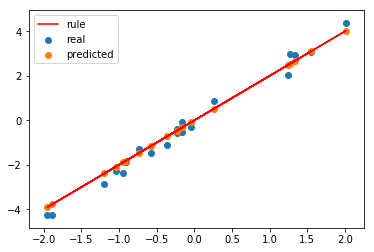

In [5]:
# 误差
def loss(prediction, label):
    loss = tf.reduce_mean(tf.square(prediction - label))
    return loss

# 反向传递
def train(model, x, y, learning_rate, batch_size, epoch):
    # 次数
    for e in range(epoch):
        # 批量
        for b in range(0,len(x.numpy()),batch_size):
            # 梯度
            with tf.GradientTape() as tape:
                loss_value = loss(model(x[b:b+batch_size]), y[b:b+batch_size])
                dW, db = tape.gradient(loss_value, [model.W, model.b])
                #print(dW, db)
            # 更新参数
            model.W.assign_sub(dW * learning_rate)
            model.b.assign_sub(db * learning_rate)
        # 显示
        print("Epoch: %03d | Loss: %.3f | W: %.3f | b: %.3f" %(e, loss(model(x), y), model.W.numpy(), model.b.numpy()))

# 训练
train(model, train_x, train_y, learning_rate = 0.01, batch_size = 2, epoch = 10)

# 评估
test_p = model(test_x)
print("Final Test Loss: %s" %loss(test_p, test_y).numpy())

# 可视化
plt.plot(test_x,test_y-noise[80:],color='red')
plt.scatter(test_x,test_y)
plt.scatter(test_x,test_p)
plt.legend(['rule','real','predicted'])

# 预测
test_p = model([1,2])
print(test_p.numpy())